# Exploratory Data Analysis - Retail Store


## Import libraries and load dataset

In [15]:
!pip install mplcursors

In [27]:
%matplotlib qt
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors


df=pd.read_csv("C:\\Users\\USER\\Downloads\\SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [17]:
df=df.drop(columns=['Ship Mode','Country','Postal Code','Segment'])
df

,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...
9989,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [18]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          9994 non-null   object 
 1   State         9994 non-null   object 
 2   Region        9994 non-null   object 
 3   Category      9994 non-null   object 
 4   Sub-Category  9994 non-null   object 
 5   Sales         9994 non-null   float64
 6   Quantity      9994 non-null   int64  
 7   Discount      9994 non-null   float64
 8   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 702.8+ KB


In [20]:
sales_df = df.groupby('Category', as_index=False)['Sales'].sum()
sales_df


,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


<function __main__.<lambda>(sel)>

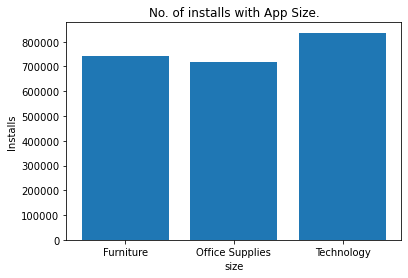

In [32]:
%matplotlib inline
fig,ax = plt.subplots()
ax.bar(sales_df['Category'],sales_df['Sales']) 
    #res= ['{0}: {1} '.format(i,j) for i,j in zip(label, y_f)]
#ax.legend(label, loc='upper center', fontsize='large',edgecolor='black', borderpad=1.0, shadow=True, handlelength=0)
ax.set_title(label="No. of installs with App Size.", loc='center', pad=None)
ax.set_ylabel('Installs')
ax.set_xlabel('size')
crs=mplcursors.cursor(ax,hover=True)

crs.connect("add", lambda sel: sel.annotation.set_text(
    'Point {},{}'.format(sel.target[0], sel.target[1])))